<h1>Implementing random graphs</h1>
<p>We will implement both Erdos-Renyi random graphs and a configurational model </p>

In [25]:
import networkx as nx
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from random import choice

In [2]:
#size of graph
n = 1000

#expected degree of graph 
z = 1.5

p = z / (n-1)

In [3]:
adj_matrix = np.triu(np.random.binomial(1, p, (n, n)), 1)
adj_matrix = adj_matrix + np.transpose(adj_matrix)

In [4]:
ERGraph = nx.from_numpy_matrix(adj_matrix)

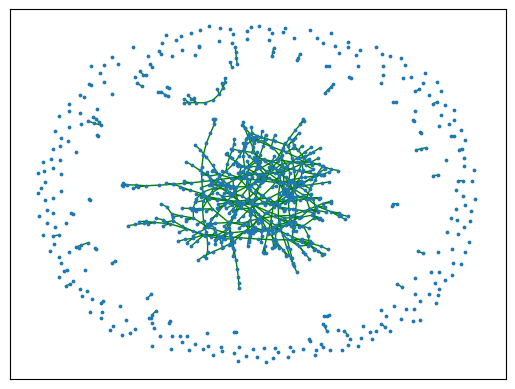

In [5]:
nx.draw_networkx(ERGraph, with_labels = False, edge_color = 'g', node_size = 3)

In [6]:
def bfs(graph, start_node):
    parents = nx.DiGraph()
    parents.add_node(start_node)
    node_distances = {}
    node_distances[start_node] = 0
    Q = []
    for x in graph[start_node]:
        Q.append(x)
        parents.add_edge(x, start_node)
        node_distances[x] = 1 + node_distances[start_node]
    
    while Q:
        u = Q.pop()
        for x in graph[u]:
            if x not in node_distances:
                Q.append(x)
                parents.add_edge(x, u)
                node_distances[x] = 1 + node_distances[u]
        
    return parents, node_distances

In [7]:
parents, distances = bfs(ERGraph, 3)

In [8]:
print(len(distances))

603


In [9]:
parents = parents.to_undirected()

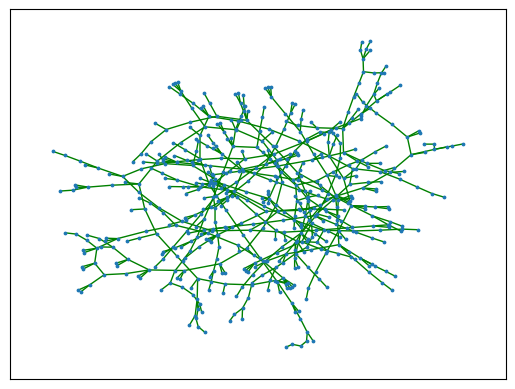

In [10]:
nx.draw_networkx(parents, pos=nx.spring_layout(parents), arrows = False, with_labels = False, edge_color = 'g', node_size = 3)

In [77]:
n = 2500
z_values = np.linspace(0, 3, 100)
gcc_size = np.zeros(z_values.shape)
print(gcc_size)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [78]:
def greatest_cluster(graph):
    subgraph_sizes = set()
    nodes = np.array(graph.nodes())
    remaining = np.ones(shape=nodes.shape, dtype='bool')
    
    
    while any(remaining):
        subnodes = nodes[remaining]
        subgraph, _ = bfs(graph.subgraph(subnodes), subnodes[0])
        subgraph_sizes.add(subgraph.number_of_nodes())
        for node in subgraph.nodes():
            remaining[node] = False
    return max(subgraph_sizes)
        

In [79]:
for i, z in np.ndenumerate(z_values):
    p = z / (n-1)
    adj_matrix = np.triu(np.random.binomial(1, p, (n, n)), 1)
    adj_matrix = adj_matrix + np.transpose(adj_matrix)
    ERGraph = nx.from_numpy_matrix(adj_matrix)
    gcc_size[i] = (greatest_cluster(ERGraph) / n)



plot solution to 1-s-e^-zs

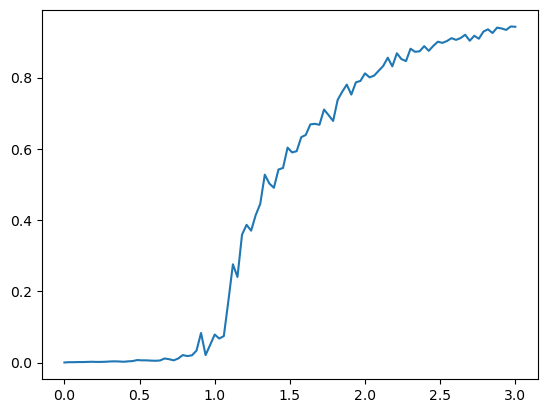

In [80]:
plt.plot(z_values, gcc_size)
plt.show()